In [1]:
import sys
import time

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

if "/home/axel/Studier/BdG-numerical/methods" not in sys.path:
    sys.path.append("/home/axel/BdG-numerical/methods")
    
from bdg_method import BdG_method
from modified_bdg_method import MBdG_method

from utils import find_critical_temperature
from utils import calculate_critical_temperature

In [2]:
%load_ext autoreload
%autoreload 2

T = 0.0 T = 0.0 T = 0.01 T = 0.01 T = 0.01 

/home/axel/BdG-numerical/methods/bdg_method.py:60: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(np.real(E)/(self.kB * self.T)) + 1)


T = 0.02 T = 0.02 T = 0.02 T = 0.03 T = 0.03 T = 0.03 T = 0.04 T = 0.04 T = 0.04 T = 0.05 T = 0.05 T = 0.06 T = 0.06 T = 0.06 T = 0.07 T = 0.07 T = 0.07 T = 0.08 T = 0.08 T = 0.08 T = 0.09 T = 0.09 T = 0.09 T = 0.1 T = 0.1 

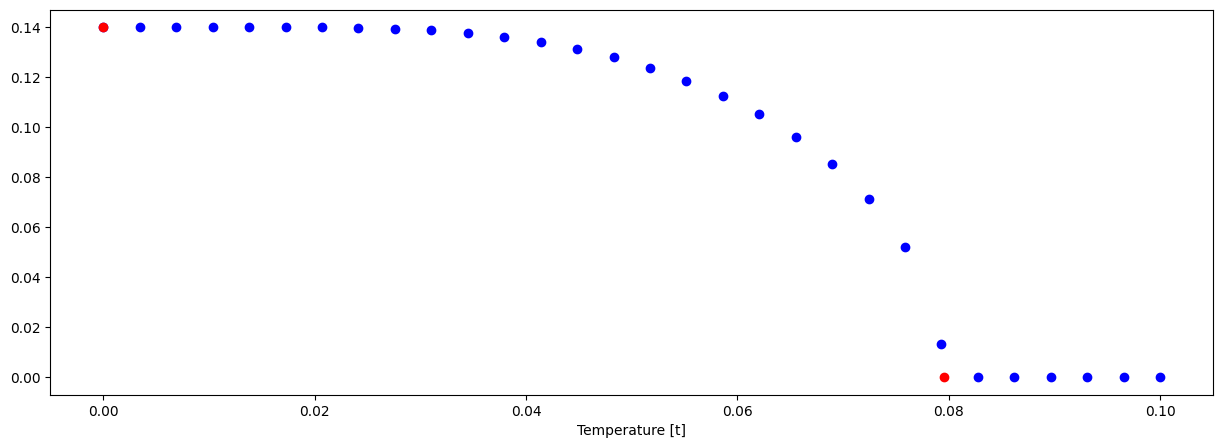

In [55]:
# Calculating the gap parameter amplitude
N = 20
Nc = 2
t = 1

mu = 0.5 * t
V = 1.5 * t

convergence_threshold = 1e-7

T_set = np.linspace(0, 0.1, 30)

fig, axs = plt.subplots(1, 1, figsize=(15,5))
last_delta = np.zeros((N,N))

# Creating a BdG instance
solver = BdG_method(N, Nc, mu, t, V, T_set[0], convergence_threshold)
for i, T in enumerate(T_set):
    solver.set_temperature(T)
    last_delta = solver.run_solver()
    
    if i == 0:
        delta0 = solver.get_global_delta()
        
    print("T = {0}".format(round(T, 2)), end=" ")
    axs.scatter(T, solver.get_global_delta(), c="b")    
    axs.set_xlabel("Temperature [t]")
    
#plotting analytical solution
Tc = delta0 / 1.76

# delta0 = 1.76 * Tc

axs.scatter(0, delta0, c="red")
axs.scatter(Tc, 0, c="red")

## Timings
Here we look at the time of convergence of the methods

In [11]:
# Calculating the gap parameter amplitude
N = 30
Nc = 2
t = 1

mu = 0.5 * t
V = 1.5 * t

convergence_threshold = 1e-7

T_set = np.linspace(0, 0.1, 10)

last_delta = np.zeros((N,N))

solver_normal = BdG_method(N, Nc, mu, t, V, T_set[0], convergence_threshold)
solver_cluster = MBdG_method(N, Nc, mu, t, V, T_set[0], convergence_threshold)

times_normal = []
times_cluster = []

for i, T in enumerate(T_set):
    print(round(T,3), end=" ")
    solver_normal.set_temperature(T)
    solver_cluster.set_temperature(T)
    
    start = time.time()
    last_delta_normal = solver_normal.run_solver()
    times_normal.append(time.time() - start)
    
    start = time.time()
    last_delta_cluster = solver_cluster.run_solver()
    times_cluster.append(time.time() - start)
    
print("Done.")

0.0 0.011 0.022 0.033 0.044 0.056 0.067 0.078 0.089 0.1 Done.


In [12]:
print(np.mean(times_normal))
print(np.mean(times_cluster))

2.3249340057373047
0.14262077808380128


In [31]:
N = 30
Nc = 12
t = 1

mu = 0.8 * t
V = 1.5 * t

convergence_threshold = 1e-4
T_set = np.linspace(0, 0.15, 20)

deltas_normal = []
deltas_cluster = []

# Creating a BdG instance
solver_normal = BdG_method(N, Nc, mu, t, V, T_set[0], convergence_threshold)
solver_cluster = MBdG_method(N, Nc, mu, t, V, T_set[0], convergence_threshold)

for i, T in enumerate(T_set):
    print(round(T, 2), end=" ")
    solver_normal.set_temperature(T)
    solver_cluster.set_temperature(T)
    
    solver_normal.run_solver()
    solver_cluster.run_solver()

    deltas_normal.append(solver_normal.get_global_delta())
    deltas_cluster.append(solver_cluster.get_global_delta())
    
print("\nDone.")

0.0 0.01 0.02 0.02 0.03 0.04 0.05 0.06 0.06 0.07 0.08 0.09 0.09 0.1 0.11 0.12 0.13 0.13 0.14 0.15 
Done.


0.11842105263157895 0.07762559266252951
0.12631578947368421 0.0876757146959955


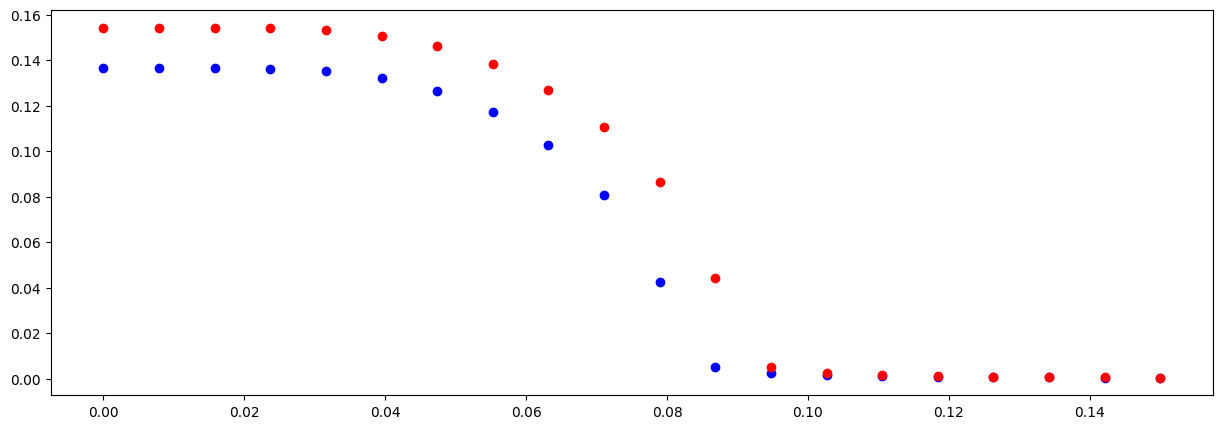

In [32]:
fig, axs = plt.subplots(1, figsize=(15,5))

axs.scatter(T_set, deltas_normal, c="b", label="Normal")  
axs.scatter(T_set, deltas_cluster, c="r", label="Cluster")  

Tc_normal = find_critical_temperature(T_set, deltas_normal, 1e-3)
Tc_cluster = find_critical_temperature(T_set, deltas_cluster, 1e-3)

print(Tc_normal, calculate_critical_temperature(deltas_normal[0]))
print(Tc_cluster, calculate_critical_temperature(deltas_cluster[0]))


# Comparing the two methods.

0.0 0.03 

KeyboardInterrupt: 

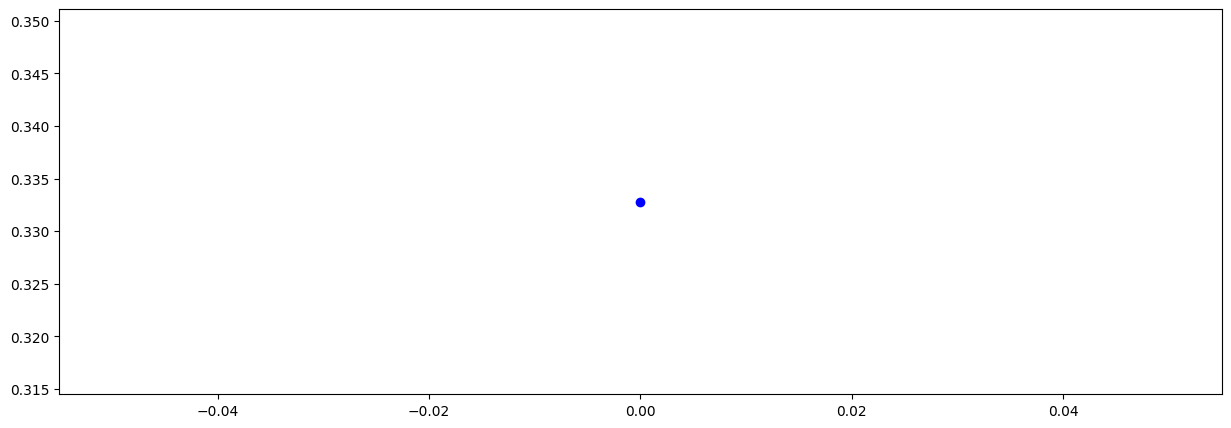

In [4]:
N = 20
Nc = 2
t = 1
mu = 0.1 * t

num_iter = 100
T_set = np.linspace(0, 0.3, 10)

# Calculating the gap parameter amplitude
fig, axs = plt.subplots(1, figsize=(15,5))

# Creating a BdG instance
solver = BdG_method(N, Nc, mu, t, 0, num_iter)
for i, T in enumerate(T_set):
    print(round(T, 2), end=" ")
    solver.set_temperature(T)
    last_delta = solver.run_solver()
    
    axs.scatter(T, np.real(solver.get_global_delta()), c="b", label="Bdg")    
    
print("")
# Creating a MBdG instance
solver = MBdG_method(N, Nc, mu, t, 0, num_iter)
for i, T in enumerate(T_set):
    print(round(T, 2), end=" ")
    solver.set_temperature(T)
    last_delta = solver.run_solver()
    
    axs.scatter(T, np.real(solver.get_global_delta()), color="red", marker="+", label="MBdg")    
    

In [10]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[2, 3], [5, 6]])

print(np.linalg.eigvals(A))
print(np.linalg.eigvals(B))

[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[-0.35889894  8.35889894]


In [21]:
A = np.arange(16).reshape(4,4)
B = A[1:,1:]
print(np.linalg.eigvals(A))
print(np.linalg.eigvals(B))


[ 3.24642492e+01 -2.46424920e+00  1.64176007e-15 -1.10576860e-16]
[ 3.07797338e+01 -7.79733838e-01 -5.07291234e-16]
